# 1 Encryption

Implement function easyCrypto() that takes as input a string and prints its encryption defined as follows: Every character at an odd position i in the alphabet will be encrypted with the character at position i + 1, and every character at an even position i will be encrypted with the character at position i - 1. In other words, ‘a’ is encrypted with ‘b’, ‘b’ with ‘a’, ‘c’ with ‘d’, ‘d’ with ‘c’, and so on. Lowercase characters should remain lowercase, and uppercase characters should remain uppercase.

      easyCrypto( 'abc' )

      bad

      easyCrypto( 'Z00' )

      YPP

In [1]:
def easyCrypto(ipStr):
    opStr = []
    for i in range(len(ipStr)):
        if ord(ipStr[i])%2 == 0:
            opStr.append(chr(ord(ipStr[i])-1))
        if ord(ipStr[i])%2 == 1:
            opStr.append(chr(ord(ipStr[i])+1))
    print(ipStr,'---',"".join(opStr))

In [2]:
easyCrypto( 'abc' )
easyCrypto( 'ZOO' )
easyCrypto( 'bac' )
easyCrypto( 'aPpLy' )

abc --- bad
ZOO --- YPP
bac --- abd
aPpLy --- bOoKz


# 2 Kids Game

Develop a simple game that teaches kindergartners how to add single-digit numbers.

Your function game() will take an integer n as input and then ask n single-digit addition questions. The numbers to be added should be chosen randomly from the range [0, 9] (i.e.,0 to 9 inclusive). The user will enter the answer when prompted. Your function should print 'Correct' for correct answers and 'Incorrect' for incorrect answers. After n questions, your function should print the number of correct answers.

      game(3)

      8 + 2 =

      Enter answer: 10

      Correct.

      6 + 7 =

      Enter answer: 12

      Incorrect.

      7 + 7 =

      Enter answer: 14

      Correct.

      You got 2 correct answers out of 3

In [3]:
import numpy as np
def game(n):
    counter = 0
    for i in range(n):
        [a,b] = np.random.choice(10,2)
        _sum = int(input(f"Enter answer for {a}+{b} = "))
        
        if a+b==_sum:
            print("Correct\n")
            counter = counter+1
        else:
            print("Incorrect\n")
    print(f"You got {counter} correct answers out of {n}")

In [4]:
game(3)

Enter answer for 8+1 = 9
Correct

Enter answer for 2+7 = 9
Correct

Enter answer for 2+0 = 2
Correct

You got 3 correct answers out of 3


# 3 Social network
In your class, many students are friends. Let’s assume that two students sharing a friend must be friends themselves; in other words, if students 0 and 1 are friends and students 1 and 2 are friends, then students 0 and 2 must be friends. Using this rule, we can partition the students into circles of friends.

To do this, implement a function networks() that takes two input arguments. The first is the number n of students in the class. We assume students are identified using integers 0 through n-1. The second input argument is a list of tuple objects that define friends. For example, tuple (0, 2) defines students 0 and 2 as friends. Function networks() should print the partition of students into circles of friends as illustrated:

      networks(5, [(0, 1), (1, 2), (3, 4)])

      Social network 0 is {0, 1, 2}

      Social network 1 is {3, 4}



In [8]:
def networks(n,lst):
    students = []
    for i in range(n):
        students.append({i}) 
    for l in lst:
        group = students[l[0]]|students[l[1]] 
#         print(group)
        for j in group:
            students[j] = group
    sets= set()
    for g in students:
        sets.add(tuple(g))
    i=0
    for s in sets:
        print(f"social network {i} is {set(s)}")
        i+=1

In [9]:
n=7
lst = [(0,2), (2,4), (3,1), (5,6)]
networks(n,lst)

social network 0 is {5, 6}
social network 1 is {1, 3}
social network 2 is {0, 2, 4}


# 4 Integrate a function by one trapezoid

An approximation to the integral of a function f(x) over an interval [a, b] can found by first approximating f(x) by the straight line that goes through the end points (a, f(a)) and (b, f(b)), and then finding the area under the straight line (which is the area of a trapezoid). The resulting formula becomes 

https://wikimedia.org/api/rest_v1/media/math/render/svg/ff1e6d438c8e663ed8ab18d19b011371c24b3ac7 

https://en.wikipedia.org/wiki/Trapezoidal_rule



(4a) Write a function trapezint1(f, a, b) that returns this approximation to the integral. The argument f is a Python implementation f(x) of the mathematical function f(x).

(4b) Write python code showing how you would do a line plot b vs trapezint1(f, a, b), assume a=0, and function f is the math.sin

In [13]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

def trapezint1(f,a,b):
    result = 0
    h = np.linspace(a,b,100)
    for i in h:
        result += (i-a)*0.5*(f(a)+f(i))
        a = i
    return result

1.9998321638939924


Text(0, 0.5, '$\\int_a^b sin(x)$')

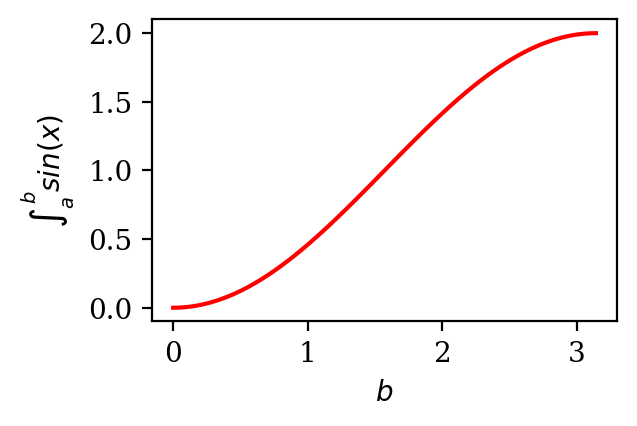

In [14]:
f = lambda x: sin(x)
print(trapezint1(f,0,np.pi))

trap=[]
bVal = np.linspace(0,np.pi,100)
[trap.append(trapezint1(f,0,b)) for b in bVal]

fig = plt.figure(figsize=(3,2),dpi=200)
plt.rc('font', family='serif')
plt.plot(bVal,trap,'r')
plt.xlabel(r'$b$')
plt.ylabel(r'$\int_a^b sin(x)$')

# 5 Detecting Trends and Foul Language in Twitter

### OBJECTIVE

This sub-project will allow you to practice manipulating dictionaries and files in your python scripts.The goal is to detect the presence of foul language and keep track of trendy topics in a sample of Twitter data. You will need two files posted on the course website: twitter_data.txt and swear_words.txt.

WARNING: Some of the tweets in the sample file actually do contain swear words.

## 5a)
Detecting Foul Language in Twitter Microblogging sites such as Twitter and Ask.fm are sometimes misused to abuse people. In this part of the assignment your task is to screen each tweet for the presence of swear words. We provide an initial list of bad words in the file named swear_words.txt. The file twitter_data.txt contains real tweets collected to study cyberbullying. Each line is a different tweet. Write a function that will read each tweet in the file, will look for swear words, and will write to a new file named potentially_offensive_tweets.txt all tweets containing foul language. Note that the sample may have repeated tweets as well as tweets in a foreign language.  You may find the need to update your swear_words.txt file. That’s expected, as the list is not comprehensive.

In [1]:
import pandas as pd
# !pip install googletrans
import googletrans
from googletrans import Translator
# import httpx

# timeout = httpx.Timeout(3) # Without this the translator timesout after a while
# tr = Translator(timeout=timeout)

In [2]:
file = open('swear_words.txt','r')
sw = file.read().split()
file.close()
file = open('twitter_data.txt','r')
tweets = file.readlines()
file.close()

In [3]:
# >>> Delete previous file to make sure you don't write to same file again <<<
!rm potentially_offensive_tweets.txt 

for i in range(len(tweets)):
    tr = Translator()
    file = open('potentially_offensive_tweets.txt', 'a+')
    tweet = tr.translate(tweets[i]).text.split()
    tweet = [tweet[j].lower() for j in range(len(tweet))]
    
    a = list(set(tweet).intersection(sw)) # if any of the sware words in the tweet
    
    if len(a)>0:
        contents = file.readlines()
        if tweets[i] in contents:
            break
        else:
            file.write(str(i)+'---'+tweets[i])
    else:
        continue
        
file.close()

## 5b) 
Detecting Topic Trends in Twitter

One of the services Twitter provides its users is the ability to track the most popular topics. For this part of the assignment you will do something similar. Your task is to keep track of the topics identified by users with the hashtag symbol ‘#’. You will also need to count the frequency of the hashtags you found and provide a ranking of hashtags based on their frequency. The output of your script should be one file, named top_hashtags.txt, with the N most popular hashtags, where N is a parameter to your function. For example, assume this is the content of your twitter_data.txt file:

      #lebron best athlete of our generation

      ML 5 Demos! Lots of great stuff to come! Yes, I&#39;m excited. :) http://htmlfive.appspot.com #io2009 #googleio

      At GWT fireside chat #googleio

      @khalid0456 No, Lebron is the best #lebron

      If N is set to 2, then your script should generate a file top_hashtags.txt with the following content (note that in case of ties the order doesn’t matter):

      #googleio 2

      #lebron 2

In [3]:
def trending(N):
    """
    Open and read twittet data and go through each tweet to find #tags
    and keep them in a data base with the tag and number of times the word 
    is tagged.
    
    Input: N
    Output: .txt file with tags with N hashtags
    """
    file = open('twitter_data.txt','r')
    
    tweets = file.readlines()
    
    file.close()
    
    tags = []
    
    for i in range(len(tweets)):
        
        tweet = tweets[i].split()
        
        for j in range(len(tweet)): 
            
            if tweet[j][0] == '#': # check if the word in a tweet start with #
                
                tag = tweet[j]
                
                if tweet[j][-1] in ['!',',','.']:  # remove punctuation 
                    
                    tag = tweet[j][:-1]
                    
                tags.append(tag.lower()) # Convert to upper or lower case to make 
                                         #sure you don't count them differently
     
    # Get the unique tags and number of unique values
    [a,b] = np.unique(tags,return_counts=True)
    a = list(a)
    b = list(b)
    
    data = {'Tag': a,'Number': b}
    df = pd.DataFrame(data)
    np.savetxt('top_hashtags.txt',df[df.Number==N],fmt='%s --- %i')
    return

ModuleNotFoundError: No module named 'numpy'

In [2]:
trending(6)

NameError: name 'np' is not defined